In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
final_file=pd.read_csv('C:/Users/Nischal/Desktop/BioVid_data_processing/graph/Output/111914_w_63.csv')

In [4]:
Only_0c = final_file[final_file.H_LABEL == 0]
Only_1c = final_file[final_file.H_LABEL == 1]
Only_2c = final_file[final_file.H_LABEL == 2]
Only_3c = final_file[final_file.H_LABEL == 3]
Only_4c = final_file[final_file.H_LABEL == 4]
a=[Only_0c["SUM_AU_r"].mean(),Only_1c["SUM_AU_r"].mean(),Only_2c["SUM_AU_r"].mean(),Only_3c["SUM_AU_r"].mean(),Only_4c["SUM_AU_r"].mean()]
b=[Only_0c["PSPI_score"].mean(),Only_1c["PSPI_score"].mean(),Only_2c["PSPI_score"].mean(),Only_3c["PSPI_score"].mean(),Only_4c["PSPI_score"].mean()]
print("Mean")
print(a)
print(b)

Mean
[nan, 6.242463576158941, 6.4452516556291375, 6.776781456953642, 9.132254966887418]
[nan, 2.688980132450331, 2.678635761589404, 2.8673774834437085, 3.834480132450331]


In [5]:
a=[Only_0c["SUM_AU_r"].var(),Only_1c["SUM_AU_r"].var(),Only_2c["SUM_AU_r"].var(),Only_3c["SUM_AU_r"].var(),Only_4c["SUM_AU_r"].var()]
b=[Only_0c["PSPI_score"].var(),Only_1c["PSPI_score"].var(),Only_2c["PSPI_score"].var(),Only_3c["PSPI_score"].var(),Only_4c["PSPI_score"].var()]
print("Variance")
print(a)
print(b)

Variance
[nan, 2.0715379499812445, 3.2918503838164037, 5.84951775944405, 21.365836947226065]
[nan, 0.5781211191811683, 0.6793875387008109, 0.8509130936299683, 3.6395417303106816]


In [6]:
a=[Only_0c["SUM_AU_r"].std(),Only_1c["SUM_AU_r"].std(),Only_2c["SUM_AU_r"].std(),Only_3c["SUM_AU_r"].std(),Only_4c["SUM_AU_r"].std()]
b=[Only_0c["PSPI_score"].std(),Only_1c["PSPI_score"].std(),Only_2c["PSPI_score"].std(),Only_3c["PSPI_score"].std(),Only_4c["PSPI_score"].std()]
print("Std")
print(a)
print(b)

Std
[nan, 1.4392838323212154, 1.8143457178323, 2.418577631469383, 4.622319433707072]
[nan, 0.7603427642722512, 0.8242496822570275, 0.9224495073606838, 1.9077582997619698]


Text(0.5, 0, 'Frames')

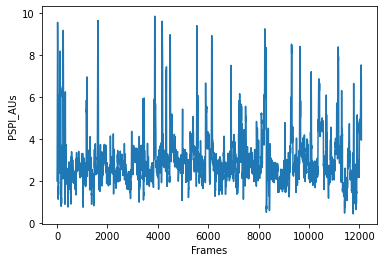

In [7]:
plt.plot(final_file['PSPI_score'])
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_AUs')
plt.xlabel('Frames')

Text(0.5, 0, 'Frames')

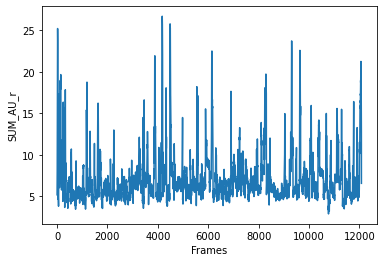

In [8]:
plt.plot(final_file['SUM_AU_r'])
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('SUM_AU_r')
plt.xlabel('Frames')

In [48]:
final_file=final_file.head(751)
final_file.to_csv(r'C:\Users\Nischal\Desktop\BioVid_data_processing\Graph\sample.csv', index=False)

In [9]:
df = pd.read_csv(r"C:\Users\Nischal\Desktop\BioVid_data_processing\Graph\sample.csv")
a=df["SUM_AU_r"]
a

0      5.20
1      5.51
2      5.49
3      5.40
4      5.60
       ... 
746    3.92
747    4.38
748    5.44
749    6.03
750    6.85
Name: SUM_AU_r, Length: 751, dtype: float64

In [10]:
AU_sum=a


In [11]:
b=a[300:]
b.mean()

6.039623059866962

In [12]:
no_pain_UL= 5
low_pain_UL= 9.5

def Pain_labeler(x_data, num_steps=25):
    """ Sliding window for calculating pain levels """
    # Prepare the list for the transformed data

    start_ix=0
    end_ix=num_steps
    
    Word_Label=[]
    
    # For the first sequence of frames: ########################################
    seq_X = x_data[start_ix:end_ix]
    one_second_value=seq_X.mean()
    
    if one_second_value<= no_pain_UL:
        Word_Label.append("No Pain")
    elif one_second_value >no_pain_UL and one_second_value<low_pain_UL:
        Word_Label.append("Low Pain")
    elif one_second_value >low_pain_UL:
        Word_Label.append("High Pain")    
    ############################################################################

    # Loop of the entire data set (apart from the first sequence)
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        start_ix= start_ix + num_steps
        end_ix = end_ix + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[start_ix:end_ix]
        one_second_value=seq_X.mean()
        if one_second_value<= no_pain_UL:
            Word_Label.append("No Pain")
        elif one_second_value >no_pain_UL and one_second_value<low_pain_UL:
            Word_Label.append("Low Pain")
        elif one_second_value >low_pain_UL:
            Word_Label.append("High Pain")

    return Word_Label

In [13]:
file=Pain_labeler(a)

In [14]:
file

['High Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'High Pain',
 'High Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'No Pain',
 'No Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'No Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'No Pain',
 'No Pain']

In [95]:
len(file)

30

Pain levels: 4,4,2,1,1


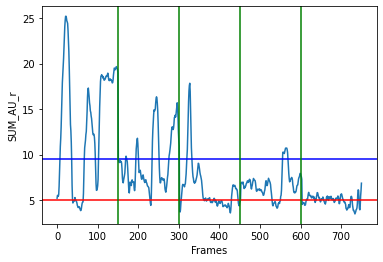

In [15]:
plt.plot(AU_sum)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('SUM_AU_r')
plt.xlabel('Frames')
plt.axhline(y=no_pain_UL, color='r', linestyle='-')
plt.axhline(y=low_pain_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
print('Pain levels: 4,4,2,1,1')

In [21]:
file

['High Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'High Pain',
 'High Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'High Pain',
 'Low Pain',
 'No Pain',
 'No Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'No Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'Low Pain',
 'No Pain',
 'No Pain']

In [27]:
count_np=0
count_lp=0
count_hp=0
for level in file:
    if level=='No Pain':
        count_np+=1
    if level=='Low Pain':
        count_lp+=1
    if level=='High Pain':
        count_hp+=1
print("The sliding window counter:    ")
print("No Pain count is:   ",count_np)
print("Low Pain count is:  ",count_lp)
print("High Pain count is: ",count_hp)

The sliding window counter:    
No Pain count is:    5
Low Pain count is:   17
High Pain count is:  8


In [16]:
# b=df["PSPI_score"]

Pain levels: 4,4,2,1,1


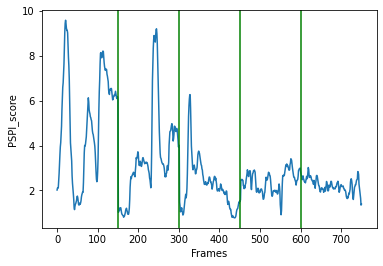

In [34]:
plt.plot(b)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_score')
plt.xlabel('Frames')
# plt.axhline(y=no_pain_UL, color='r', linestyle='-')
# plt.axhline(y=low_pain_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
# plt.legend()
print('Pain levels: 4,4,2,1,1')